In [1]:
#imports
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib notebook

# Assignment 2: Due Tuesday 9/19

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = 0 $

* $x' = v_{x} $ 

* $v_y' = g $


* $y' =  v_{y} $


Code the equations into a function 

In [86]:
#define projectile motion function in vaccum
#def proj_vac

def proj_vac(t, state_0):
    #mass initially in grams --> ocnvert to kilo by /1000
    mass = (7.8 * ((4/3) * np.pi * (7.5)**3)/1000)
    g = 9.8
    vx_dot = 0
    x_dot = state_0[2]
    vy_dot = -g
    y_dot = state_0[3]
    dstate_dt = np.array([x_dot, y_dot, vx_dot, vy_dot])

    return dstate_dt

In [87]:
X_0 = 0
Y_0 = 0
VX_0 = np.cos(50 * np.pi/180.0) * 300
VY_0 = np.sin(50 * np.pi/180.0) * 300
t0 = 0
tf = 50
timeArr = np.linspace(0, 50, num = 2000)
state_0 = np.array([X_0, Y_0, VX_0, VY_0])

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [99]:
sol_ODE = integrate.solve_ivp(proj_vac,(t0, tf), state_0, method = 'RK45', t_eval = timeArr)

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

<IPython.core.display.Javascript object>


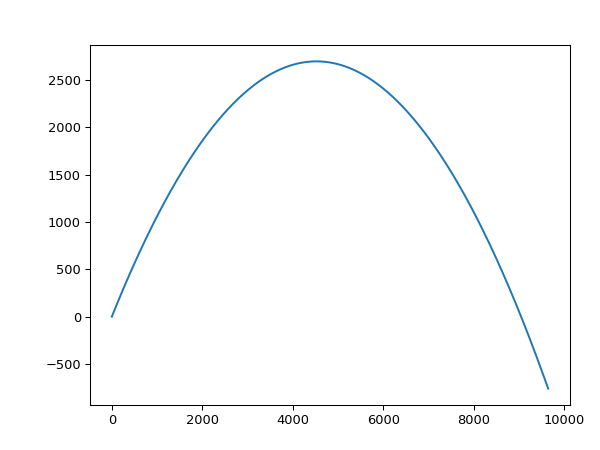

In [98]:
fig = plt.figure()
axes = fig.add_axes([0.15, 0.1, 0.8, 0.8])
axes.plot(sol_ODE.y[0], sol_ODE.y[1])
#ball hits ground at ~47 seconds

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

<IPython.core.display.Javascript object>


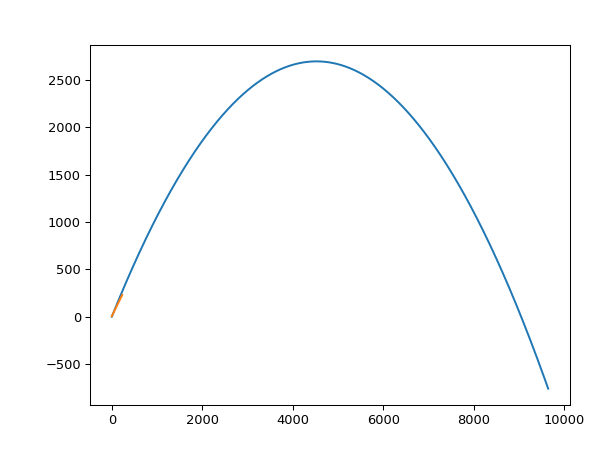

In [101]:
#code
def rungekutta_4(f, t, x0):
    n = len(t)
    x = np.zeros( ( n, len(x0) ) )
    x[0] = x0
    for i in range (0, n - 1):
        dt = t[i + 1] - t[i]
        k1 = f(t[i], x[i])
        k2 = f(t[i] + dt/2 , x[i] + dt*k1/2)
        k3 = f(t[i] + dt/2, x[i] + dt*k2/2)
        k4 = f(t[i] + dt, x[i] + dt*k3)
        x[i + 1] = x[i] + dt/6*(k1 + 2*k2 + 3*k3 + k4)
        
    return x

sol_ownODE = rungekutta_4(proj_vac, timeArr, state_0)
fig_r = plt.figure()
axes_r = fig_r.add_axes([0.15,0.1,0.8,0.8])
axes_r.plot(sol_ODE.y[0], sol_ODE.y[1])
axes_r.plot(sol_ownODE[0], sol_ownODE[1])

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):

* $v_{x}' = (-\left(c\sqrt{v^2_x +v^2_y}\right)v_x)/m$

* $v_{y}' = - g - (\left(c\sqrt{v^2x + v^2_y}) \right)v_y)/m$

* $x' = v_x$

* $y' = v_y$

Code the equations into a function

In [7]:
#code
def proj_constant2(t, state_0):
    #mass initially in grams --> ocnvert to kilo by /1000
    mass = (7.8 * ((4/3) * np.pi * (7.5)**3)/1000)
    g = 9.8
    c = 0.25 * (0.15**2)
    vx_dot = -(c*((state_0[2]**2 + state_0[3]**2)**(1/2)*state_0[2]))/mass
    x_dot = state_0[2]
    vy_dot = -g - (c*(((state_0[2]**2 + state_0[3]**2)**(1/2))*state_0[3]))/mass
    y_dot = state_0[3]
    dstate_dt = [x_dot, y_dot, vx_dot, vy_dot]
    
    return dstate_dt


In [8]:
X_0 = 0
Y_0 = 0
VX_0 = np.cos(50 * np.pi/180.0) * 300
VY_0 = np.sin(50 * np.pi/180.0) * 300
t0 = 0
tf = 35
timeArr2 = np.linspace(0, 35, num = 2000)
state_0 = np.array([X_0, Y_0, VX_0, VY_0])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [9]:
sol_ODE2 = integrate.solve_ivp(proj_constant2,(t0, tf), state_0, method = 'RK45', t_eval = timeArr2)
print(sol_ODE2)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.751e-02 ...  3.498e+01  3.500e+01]
        y: [[ 0.000e+00  3.373e+00 ...  2.832e+03  2.832e+03]
            [ 0.000e+00  4.018e+00 ... -4.751e+02 -4.774e+02]
            [ 1.928e+02  1.924e+02 ...  3.341e+01  3.337e+01]
            [ 2.298e+02  2.292e+02 ... -1.313e+02 -1.313e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0


Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

<IPython.core.display.Javascript object>


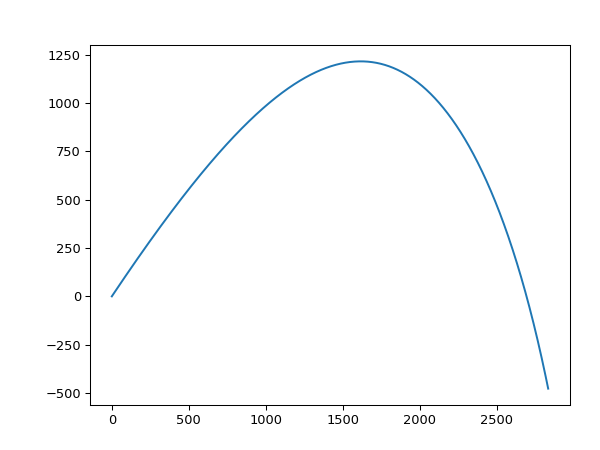

In [103]:
#codes
fig2 = plt.figure()
axes2 = fig2.add_axes([0.15, 0.1, 0.8, 0.8])
axes2.plot(sol_ODE2.y[0], sol_ODE2.y[1])
#ball hits ground at ~31 seconds

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):


* $v_{x}' = (-\left(\gamma D^2exp(-y/\lambda)\sqrt{v^2_x +v^2_y}\right)v_x)/m$

* $v_{y}' = - g - (\left(\gamma D^2exp(-y/\lambda)\sqrt{v^2x + v^2_y}) \right)v_y)/m$

* $x' = v_x$

* $y' = v_y$

Code the equations into a function

In [11]:
def proj_constant3(t, state_0):
    #mass initially in grams --> ocnvert to kilo by /1000
    gamma = 0.25
    lamb = 10000
    D = 0.15
    mass = (7.8 * ((4/3) * np.pi * (7.5)**3)/1000)
    c = (gamma * (D**2) * np.exp(-state_0[1]/lamb))
    g = 9.8
    vx_dot = -(c*((state_0[2]**2 + state_0[3]**2)**(1/2))*state_0[2])/mass
    x_dot = state_0[2]
    vy_dot = -g - (c*((state_0[2]**2 + state_0[3]**2)**(1/2))*state_0[3])/mass
    y_dot = state_0[3]
    dstate_dt = [x_dot, y_dot, vx_dot, vy_dot]
    
    return dstate_dt

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [12]:
X_0 = 0
Y_0 = 0
VX_0 = np.cos(50 * np.pi/180.0) * 300
VY_0 = np.sin(50 * np.pi/180.0) * 300
t0 = 0
tf = 35
state_0 = np.array([X_0, Y_0, VX_0, VY_0])
timeArr3 = np.linspace(0, 35, num = 2000)
sol_ODE3 = integrate.solve_ivp(proj_constant3,(t0, tf), state_0, method = 'RK45', t_eval = timeArr3)
print(sol_ODE3)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.751e-02 ...  3.498e+01  3.500e+01]
        y: [[ 0.000e+00  3.373e+00 ...  2.945e+03  2.945e+03]
            [ 0.000e+00  4.018e+00 ... -4.298e+02 -4.321e+02]
            [ 1.928e+02  1.924e+02 ...  3.603e+01  3.600e+01]
            [ 2.298e+02  2.292e+02 ... -1.308e+02 -1.309e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0


Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

<IPython.core.display.Javascript object>


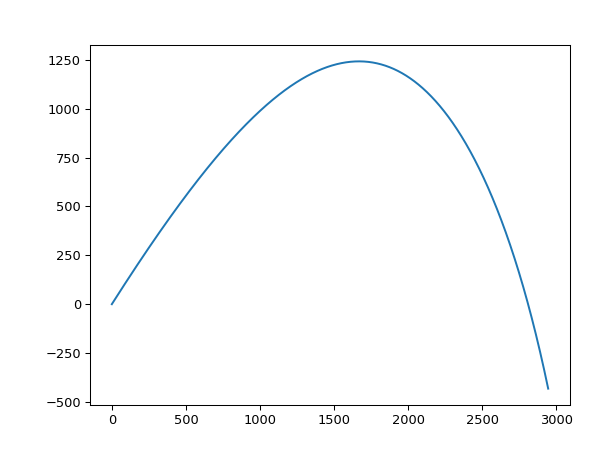

In [106]:
fig3 = plt.figure()
axes3 = fig3.add_axes([0.15, 0.1, 0.8, 0.8])
axes3.plot(sol_ODE3.y[0], sol_ODE3.y[1])
#ball hits ground at ~31.5 s

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


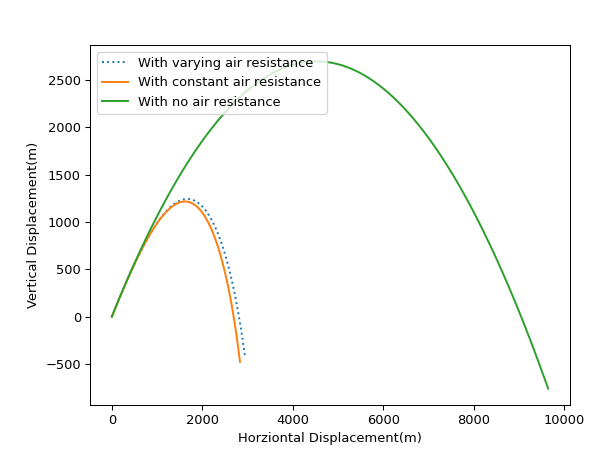

Text(0, 0.5, 'Vertical Displacement(m)')

In [116]:
fig4 = plt.figure()
axes4 = fig4.add_axes([0.15, 0.1, 0.8, 0.8])
axes4.plot(sol_ODE3.y[0], sol_ODE3.y[1], label = 'With varying air resistance', linestyle = 'dotted')
axes4.plot(sol_ODE2.y[0], sol_ODE2.y[1], label = 'With constant air resistance')
axes4.plot(sol_ODE.y[0], sol_ODE.y[1], label = 'With no air resistance')
legend = plt.legend(loc = "upper left")
axes4.set_xlabel('Horziontal Displacement(m)')
axes4.set_ylabel('Vertical Displacement(m)')

Your results should look like the plot below.

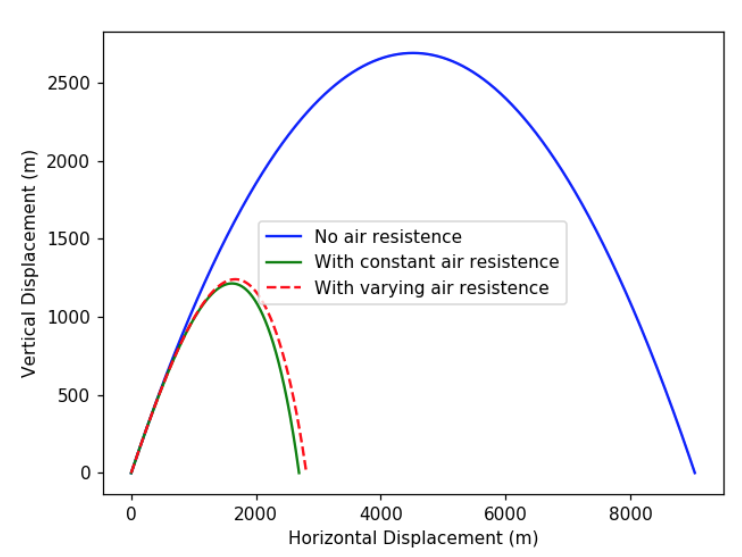

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

In [ ]:
Turning on the constant air resistance impacts the motion more.